# Speech Emotion Recognition with Librosa
Speech Emotion Recognition (SER) with Librosa is a project focused on analyzing and classifying emotions expressed in speech audio. Librosa is a Python package for music and audio analysis, and it provides various tools for feature extraction, signal processing, and machine learning tasks.<br><br>

In this project, speech signals are first preprocessed using Librosa to extract relevant features such as Mel-frequency cepstral coefficients (MFCCs), spectral centroid, and chroma features. These features capture important characteristics of the speech audio, which are then used as input to machine learning models.<br><br>

Machine learning algorithms like support vector machines (SVM), random forests, or deep neural networks (DNNs) are commonly employed to classify the emotional content of the speech. These models are trained on labeled datasets containing examples of speech along with their corresponding emotional labels (e.g., happy, sad, angry).<br>

The process typically involves several steps:<br>

1. **Data Collection and Preprocessing**: Gather a dataset of speech samples labeled with emotional categories. Preprocess the audio signals to extract relevant features using Librosa.

2. **Feature Extraction**: Use Librosa to extract features from the preprocessed audio signals. These features could include MFCCs, chroma features, energy, pitch, etc.

3. **Model Training**: Train machine learning models (e.g., SVM, random forest, DNN) using the extracted features and their corresponding emotional labels. The models learn to classify the emotions based on the extracted features.

4. **Model Evaluation**: Evaluate the trained models using validation or cross-validation techniques to assess their performance in recognizing emotions from speech.

5. **Testing and Deployment**: Test the trained model on unseen data to evaluate its generalization performance. Once satisfied with the model's performance, it can be deployed for real-world applications such as emotion detection in call centers, sentiment analysis in customer feedback, or human-computer interaction systems.<br><br>

Overall, Speech Emotion Recognition with Librosa involves leveraging the capabilities of Librosa for feature extraction and employing machine learning techniques to classify emotions expressed in speech audio.

## Libraries

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import seaborn as sns
import pickle
import json
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import IPython.display as ipd # To play sounds in the notebook
import os
import sys

# keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Functions to plot confusion matrices
from functions_plot import print_confusion_matrix, gender

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Building dataset
This code snippet assigns file paths to variables TESS, RAV, SAVEE, and CREMA. Each variable represents a directory containing audio data related to emotional speech datasets. Here's the link:
- [Toronto emotional speech set (TESS)](https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess)
- [CREMA-D](https://www.kaggle.com/datasets/ejlok1/cremad)
- [RAVDESS Emotional speech audio](https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio)
- [Survey Audio-Visual Expressed Emotion (SAVEE)](https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee)

These variables serve as convenient references to the respective dataset directories, which may be utilized for accessing and processing the audio data within each dataset.


In [26]:
# for dirname, _, filenames in os.walk('/kaggle/input'):
#   for filename if filename:
#       print(os.path.join(dirname, filename))

TESS="kaggle/input/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"
RAV="kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
SAVEE="kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"
CREMA="kaggle/input/cremad/AudioWAV/"

### Exploring and preparation of the dataset

In [9]:
# Base directory
base_dir="kaggle/input/"

# Get list of directories inside kaggle/input/
dir_list=[d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

# Print the list of directories
for item in dir_list:
    print(item)

cremad
ravdess-emotional-speech-audio
surrey-audiovisual-expressed-emotion-savee
TESS Toronto emotional speech set data


In [10]:
# Run one example
dir_save=os.listdir(SAVEE)
dir_save[0:5]

['DC_a01.wav', 'DC_a02.wav', 'DC_a03.wav', 'DC_a04.wav', 'DC_a05.wav']

This code snippet aims to process the audio files within the SAVEE dataset directory. Similarly, similar steps will be taken for all datasets.<br><br>
This process extracts emotional labels and file paths from the filenames of audio files within the SAVEE dataset directory. Similar steps will be taken for other datasets to extract emotion labels and file paths.

In [11]:
# Get the data location for SAVEE
dir_save=os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path=[]

for i in dir_save:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE+i)

In [12]:
# Now check out the label count distribuion

SAVEE_df=pd.DataFrame(emotion, columns=['labels'])
SAVEE_df['source']='SAVEE'
SAVEE_df=pd.concat([SAVEE_df, pd.DataFrame(path, columns=['path'])], axis=1)
SAVEE_df.labels.value_counts()

labels
male_neutral     120
male_angry        60
male_disgust      60
male_fear         60
male_happy        60
male_sad          60
male_surprise     60
Name: count, dtype: int64

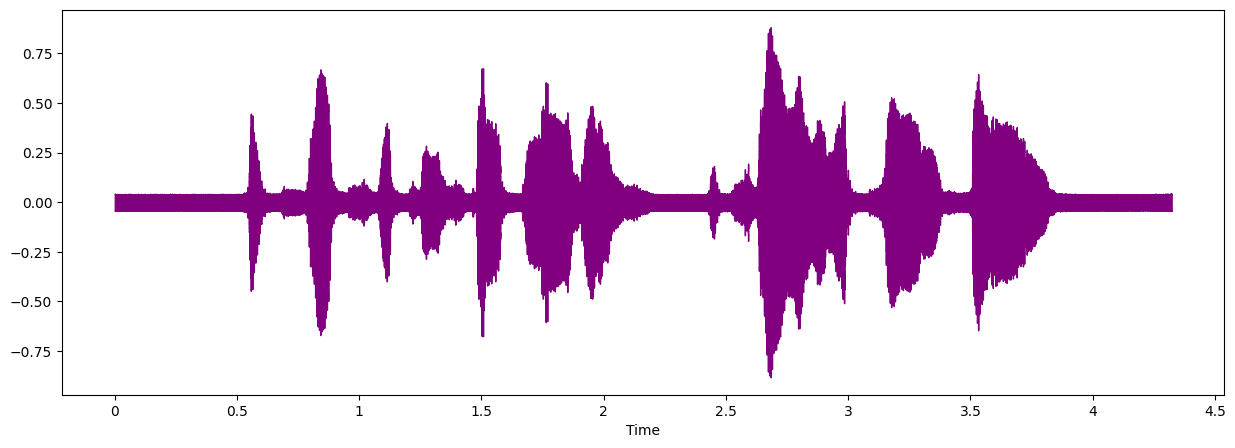

In [18]:
# Use Libros library for this task
fname=SAVEE+'DC_f11.wav'
data, sampling_rate=librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate, color='purple')

# Lets play the audio
ipd.Audio(fname)

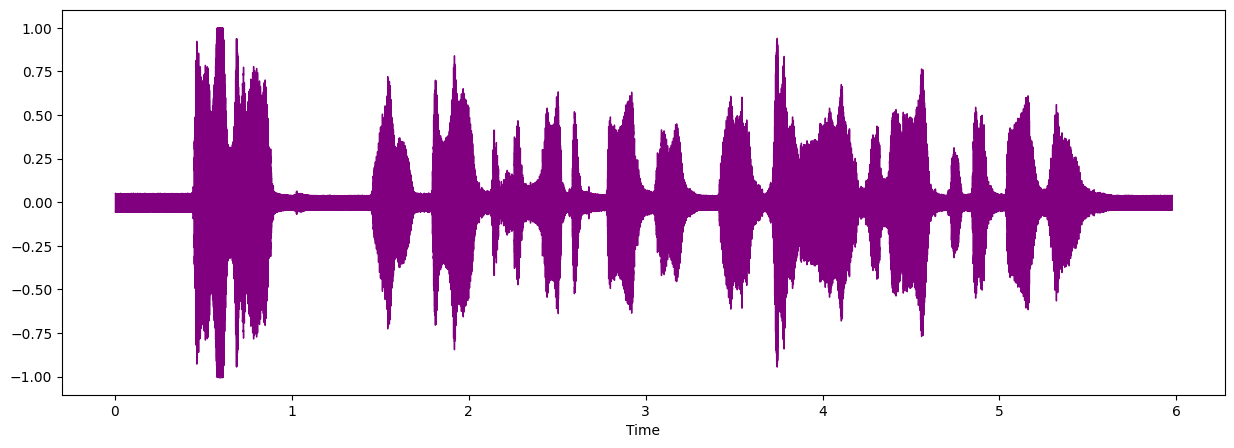

In [19]:
# Lets play a happy track
fname = SAVEE + 'DC_h11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate, color='purple')

# Lets play the audio 
ipd.Audio(fname)

Now I'll focus in 'RAV' dataset

In [20]:
dir_rav=os.listdir(RAV)
dir_rav.sort()

emotion=[]
gender=[]
path=[]

for i in dir_rav:
    fname=os.listdir(RAV+i)
    for f in fname:
        part=f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp=int(part[6])
        if temp%2==0:
            temp="female"
        else:
            temp="male"
        gender.append(temp)
        path.append(RAV+i+'/'+f)

In [21]:
RAV_df=pd.DataFrame(emotion)
RAV_df=RAV_df.replace({1:'neutral',
                       2:'neutral',
                       3:'happy',
                       4:'sad',
                       5:'angry',
                       6:'fear',
                       7:'disgust',
                       8:'surprise'})
RAV_df=pd.concat([pd.DataFrame(gender), RAV_df], axis=1)
RAV_df.columns=['gender', 'emotion']
RAV_df['labels']=RAV_df.gender+'_'+RAV_df.emotion
RAV_df['source']='RAVDESS'
RAV_df=pd.concat([RAV_df, pd.DataFrame(path, columns=['path'])], axis=1)
RAV_df=RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

labels
male_neutral       144
female_neutral     144
male_happy          96
male_sad            96
male_angry          96
male_fear           96
male_disgust        96
male_surprise       96
female_happy        96
female_sad          96
female_angry        96
female_fear         96
female_disgust      96
female_surprise     96
Name: count, dtype: int64

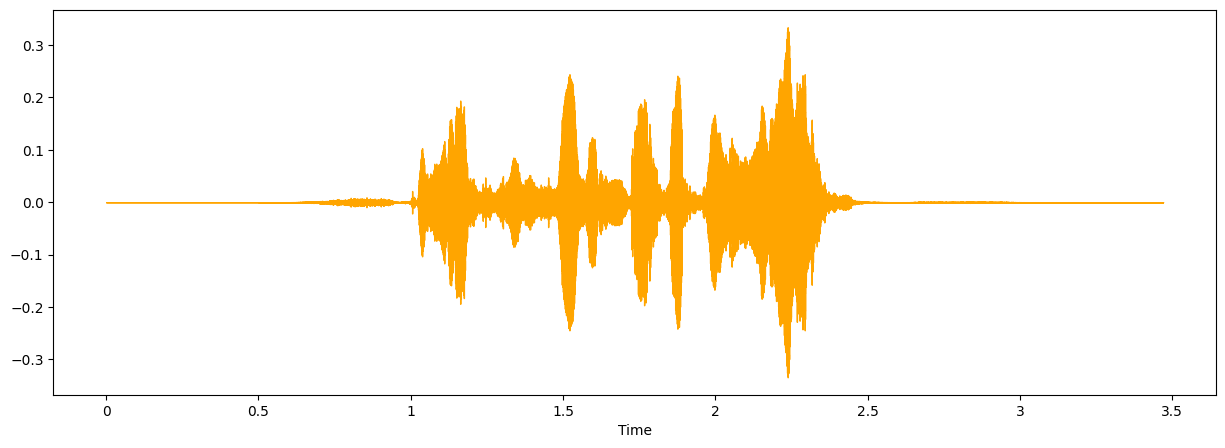

In [23]:
# Pick a fearful track
fname = RAV + 'Actor_14/03-01-06-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate, color='orange')

# Lets play the audio 
ipd.Audio(fname)

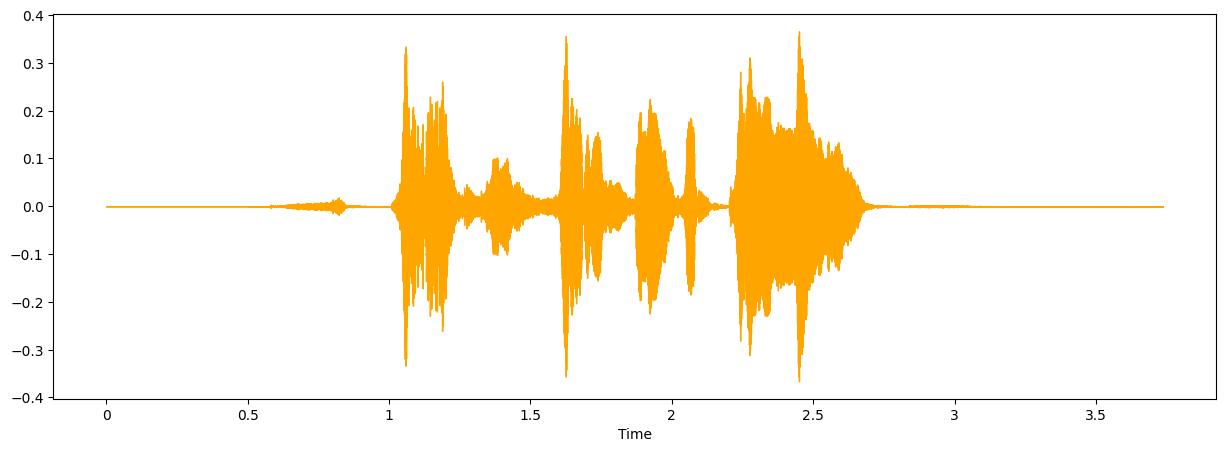

In [24]:
# Pick a happy track
fname = RAV + 'Actor_14/03-01-03-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate, color='orange')

# Lets play the audio 
ipd.Audio(fname)

Now I'll focus in 'TESS' dataset

In [27]:
dir_tess=os.listdir(TESS)
dir_tess.sort()
dir_tess

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [28]:
path=[]
emotion=[]

for i in dir_tess:
    fname=os.listdir(TESS+i)
    for f in fname:
        if i=='OAF_angry' or i=='YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS+i+"/"+f)

In [29]:
TESS_df=pd.DataFrame(emotion, columns=['labels'])
TESS_df['source']='TESS'
TESS_df=pd.concat([TESS_df, pd.DataFrame(path, columns=['path'])], axis=1)
TESS_df.labels.value_counts()

labels
female_fear        400
female_surprise    400
female_sad         400
female_angry       400
female_disgust     400
female_happy       400
female_neutral     400
Name: count, dtype: int64

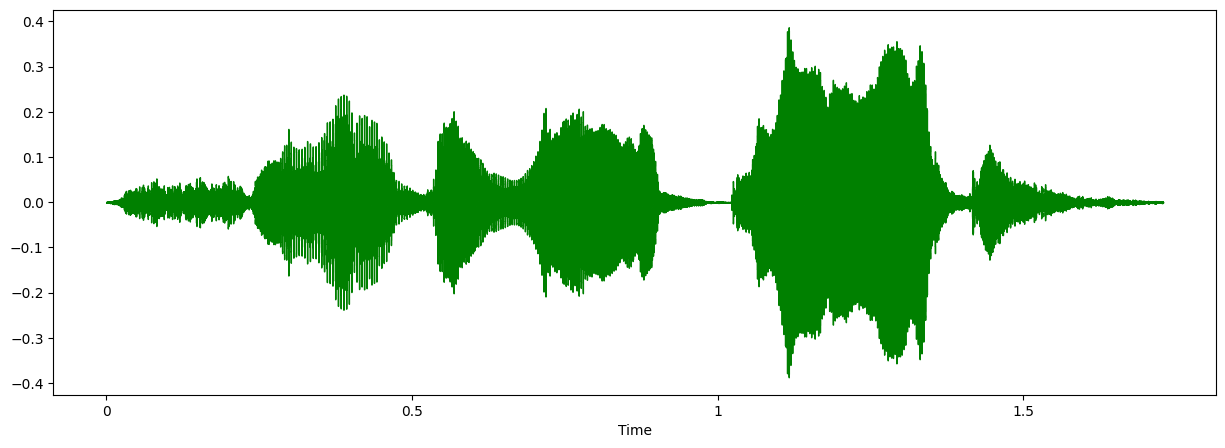

In [30]:
# lets play a fearful track 
fname = TESS + 'YAF_fear/YAF_dog_fear.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate, color='green')

# Lets play the audio 
ipd.Audio(fname)

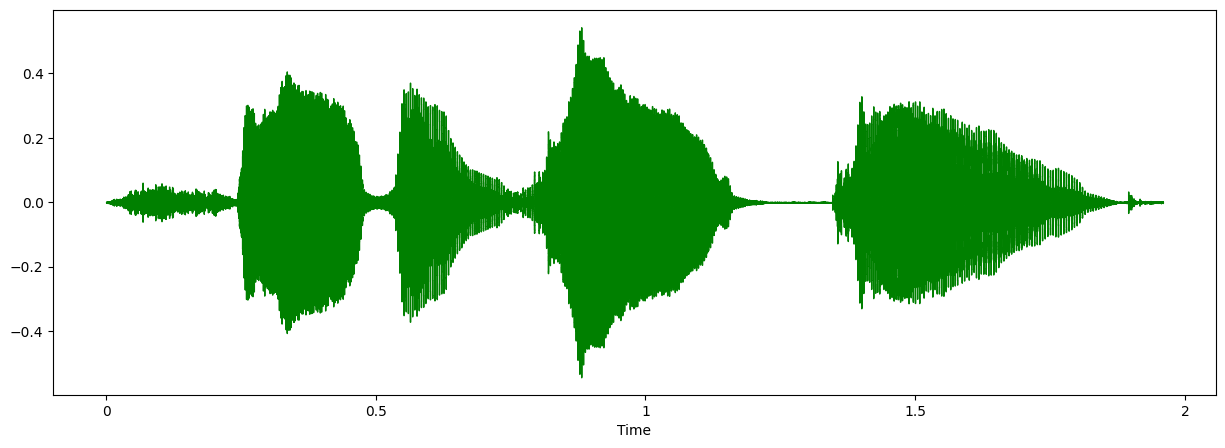

In [31]:
# lets play a happy track 
fname =  TESS + 'YAF_happy/YAF_dog_happy.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate, color='green')

# Lets play the audio 
ipd.Audio(fname)

Now I'll focus in 'CREMAD' dataset

In [32]:
dir_crema=os.listdir(CREMA)
dir_crema.sort()
print(dir_crema[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [33]:
gender=[]
emotion=[]
path=[]
female=[1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,
        1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,1052,1053,1054,
        1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,
        1082,1084,1089,1091]

for i in dir_crema:
    part=i.split('_')
    if int(part[0]) in female:
        temp='female'
    else:
        temp='male'
    gender.append(temp)
    if part[2]=='SAD' and temp=='male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA+i)

In [34]:
CREMA_df=pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source']='CREMA'
CREMA_df=pd.concat([CREMA_df,pd.DataFrame(path, columns=['path'])],axis=1)
CREMA_df.labels.value_counts()

labels
male_angry        671
male_disgust      671
male_fear         671
male_happy        671
male_sad          671
female_angry      600
female_disgust    600
female_fear       600
female_happy      600
female_sad        600
male_neutral      575
female_neutral    512
Name: count, dtype: int64

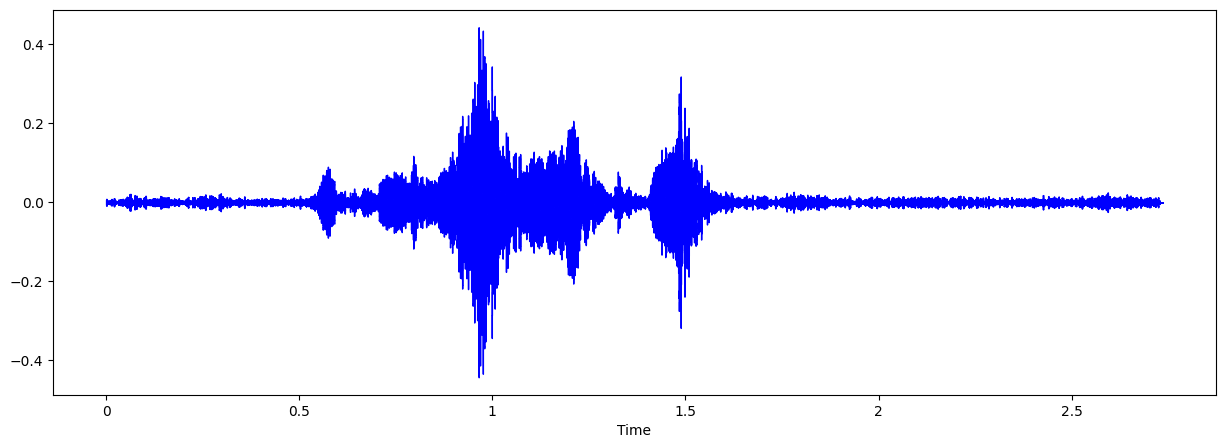

In [35]:
# use the Librosa library for this task 
fname=CREMA+'1012_IEO_HAP_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate, color='blue')

# Lets play the audio 
ipd.Audio(fname)

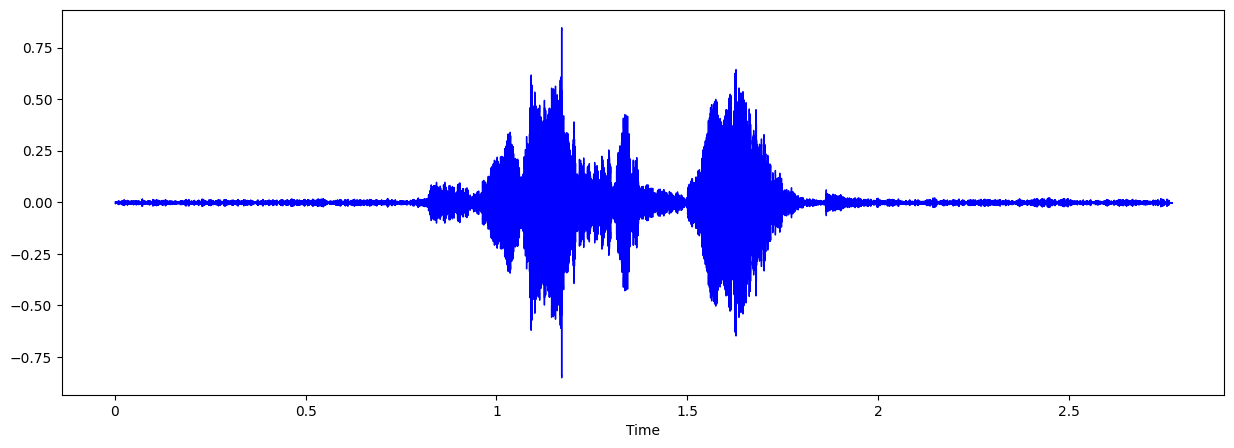

In [36]:
# A fearful track
fname=CREMA+'1012_IEO_FEA_HI.wav'  
data, sampling_rate=librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate, color='blue')

# Lets play the audio 
ipd.Audio(fname)

This code concatenates multiple DataFrames representing different datasets, prints the value counts of labels in the combined dataset, displays the first few rows of the combined DataFrame, and finally saves the combined DataFrame to a CSV file.

In [37]:
df=pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis=0)
print(df.labels.value_counts())

labels
female_happy       1096
female_sad         1096
female_angry       1096
female_fear        1096
female_disgust     1096
female_neutral     1056
male_neutral        839
male_angry          827
male_disgust        827
male_fear           827
male_happy          827
male_sad            827
female_surprise     496
male_surprise       156
Name: count, dtype: int64


In [38]:
df.head(10)

labels source                                               path
0  male_angry  SAVEE  kaggle/input/surrey-audiovisual-expressed-emot...
1  male_angry  SAVEE  kaggle/input/surrey-audiovisual-expressed-emot...
2  male_angry  SAVEE  kaggle/input/surrey-audiovisual-expressed-emot...
3  male_angry  SAVEE  kaggle/input/surrey-audiovisual-expressed-emot...
4  male_angry  SAVEE  kaggle/input/surrey-audiovisual-expressed-emot...
5  male_angry  SAVEE  kaggle/input/surrey-audiovisual-expressed-emot...
6  male_angry  SAVEE  kaggle/input/surrey-audiovisual-expressed-emot...
7  male_angry  SAVEE  kaggle/input/surrey-audiovisual-expressed-emot...
8  male_angry  SAVEE  kaggle/input/surrey-audiovisual-expressed-emot...
9  male_angry  SAVEE  kaggle/input/surrey-audiovisual-expressed-emot...

In [39]:
df.to_csv("Data_path.csv", index=False)

These operations are performed on an audio file representing a specific emotion (anger) from a particular dataset (RAVDESS) and a specific actor (female). Similar operations can be conducted on different audio files representing various emotions, genders, and actors from other datasets (e.g., TESS, SAVEE, CREMA) to explore and analyze their acoustic features.<br><br>
1. __Loading Audio Data__:<br>
It loads an audio file from the RAVDESS dataset, representing a female actor expressing anger. The audio file path is specified, and `librosa.load()` is used to load the audio data. Parameters such as res_type, duration, sr, and offset are provided to control the loading process.

2. __Extracting MFCC Features__:<br>
Once the audio data is loaded, `librosa.feature.mfcc()` is used to extract Mel-frequency cepstral coefficients (MFCCs) from the audio signal. MFCCs are commonly used in speech and audio processing tasks for feature extraction.

3. __Plotting Audio Waveform__:
<br>The waveform of the audio signal (X) is plotted using `librosa.display.waveshow()`. This visualization provides a representation of the audio waveform over time.

4. __Plotting MFCC__:<br>
The extracted MFCC features (mfcc) are plotted using `librosa.display.specshow()`. This visualization displays the MFCC coefficients over time, providing insight into the spectral characteristics of the audio signal.

5. __Playing Audio__:<br>
Finally, `ipd.Audio()` is used to play the audio file, allowing for auditory inspection of the recorded speech sample.


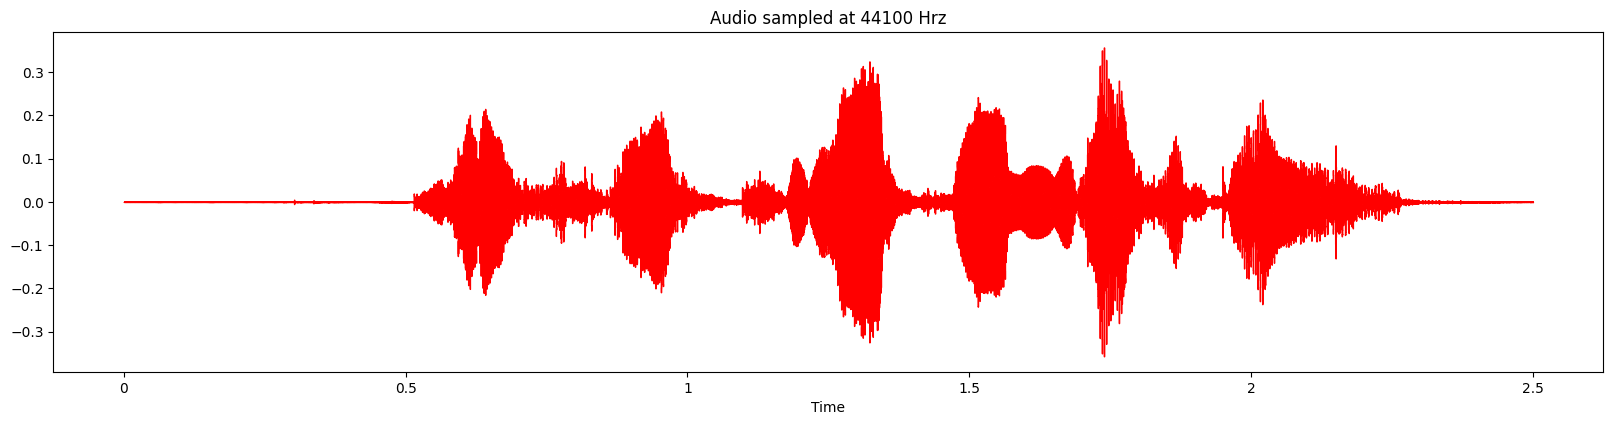

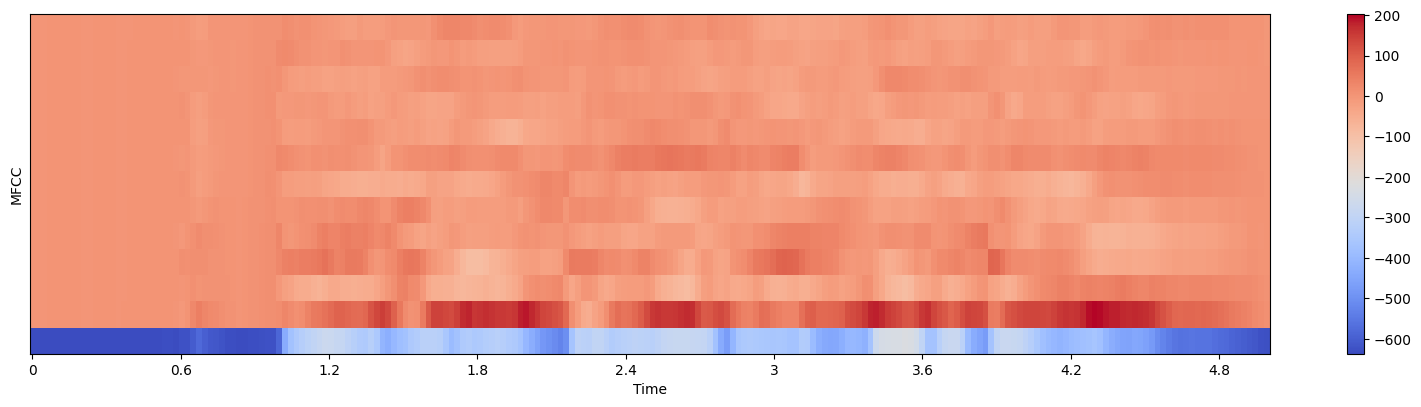

In [49]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path="kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"

X, sample_rate=librosa.load(path, res_type='soxr_hq', duration=2.5, sr=22050*2, offset=0.5)
mfcc=librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# Audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3, 1, 1)
librosa.display.waveshow(X, sr=sample_rate, color='red')
plt.title('Audio sampled at 44100 Hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3, 1, 2)  # Use a different subplot index
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

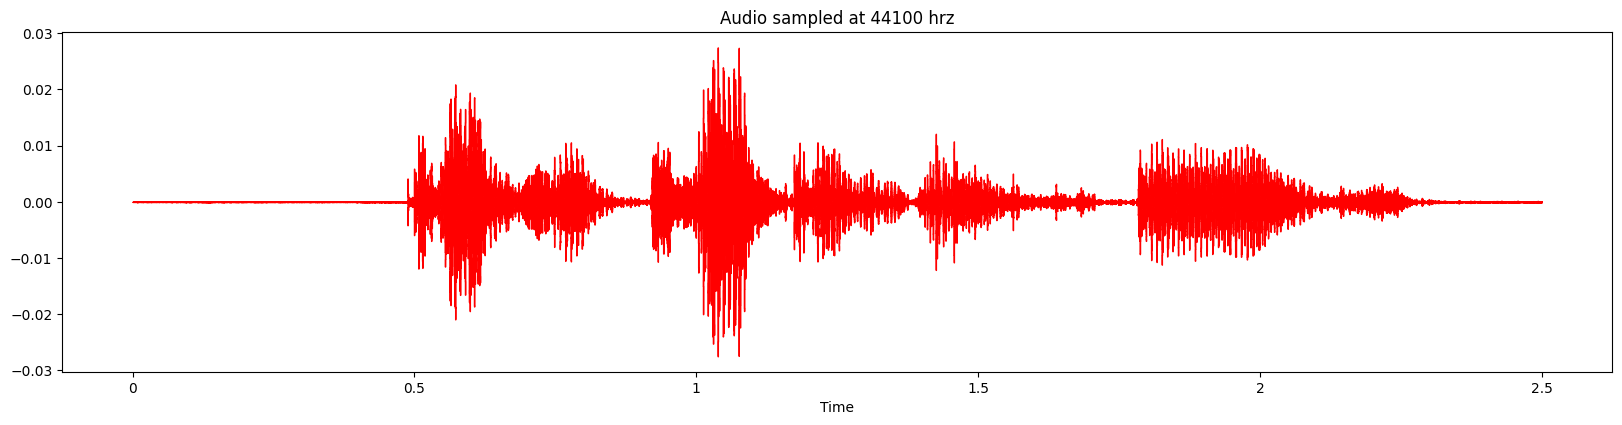

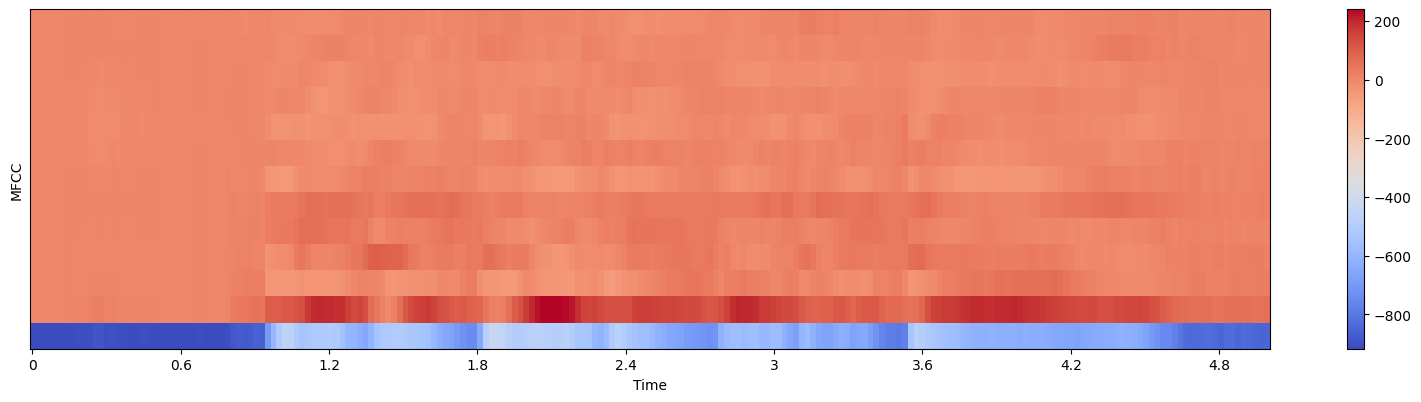

In [52]:
# Source - RAVDESS; Gender - Male; Emotion - Angry 
path="kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate=librosa.load(path, res_type='soxr_hq', duration=2.5, sr=22050*2, offset=0.5)
mfcc=librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate, color='red')
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

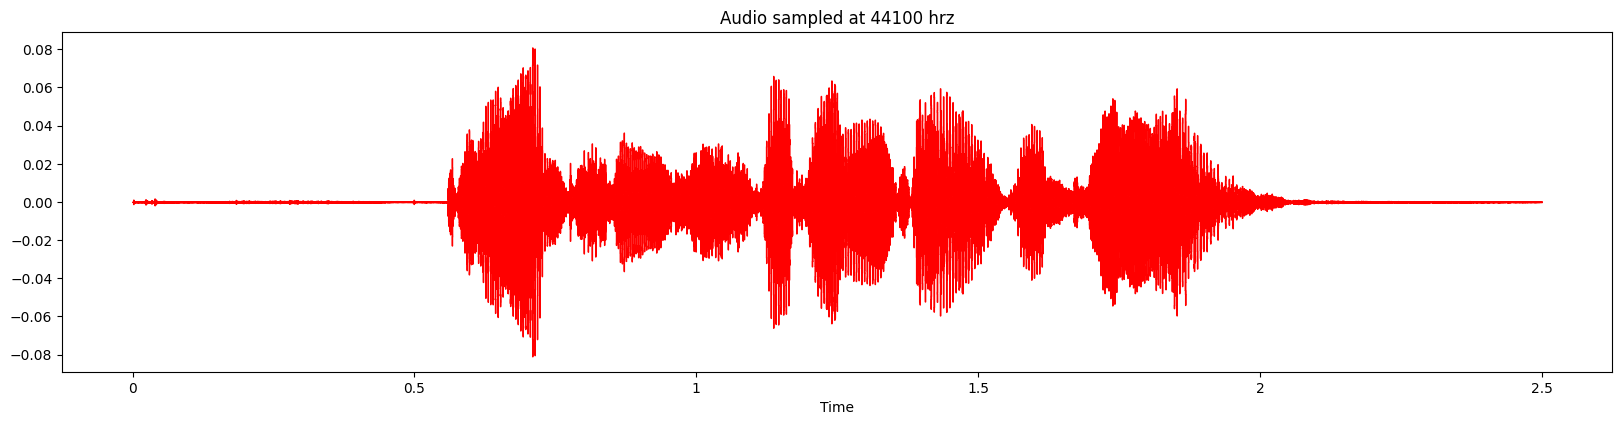

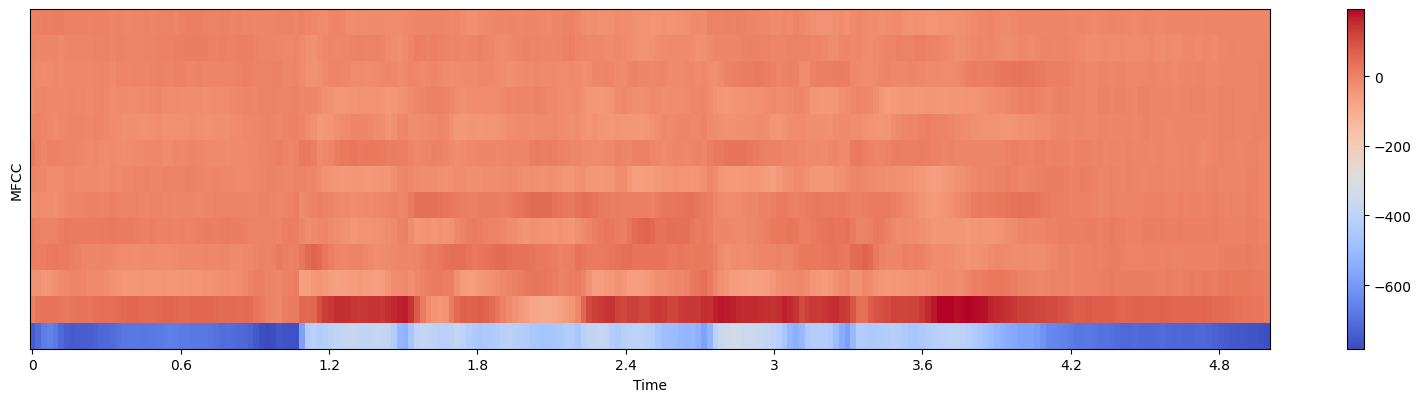

In [53]:
# Source - RAVDESS; Gender - Female; Emotion - Happy 
path="kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate=librosa.load(path, res_type='soxr_hq', duration=2.5, sr=22050*2, offset=0.5)
mfcc=librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate, color='red')
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

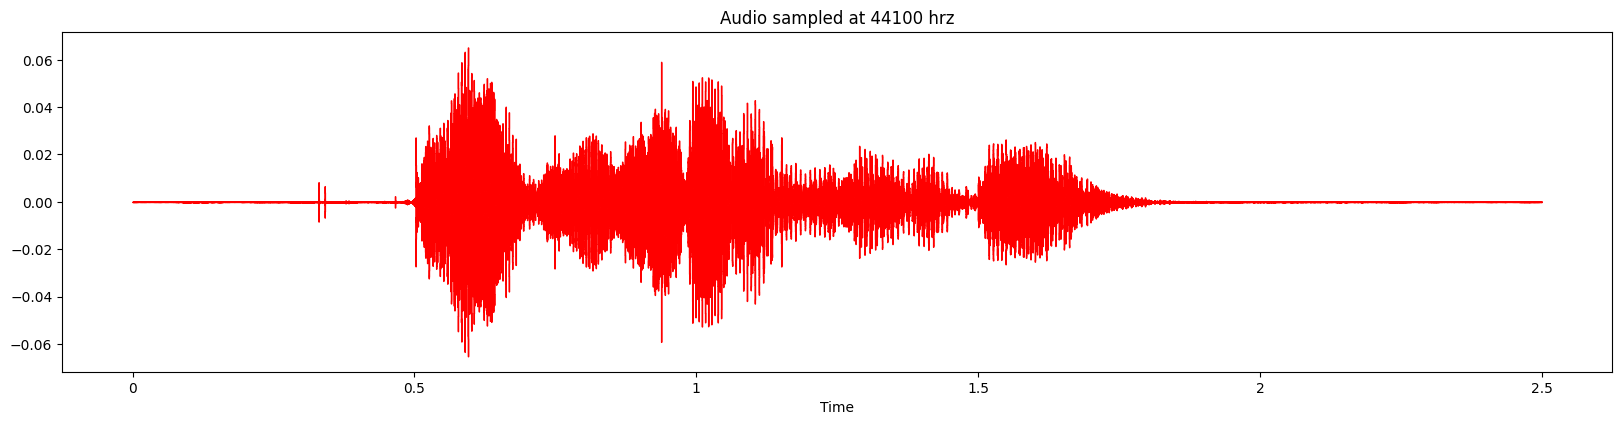

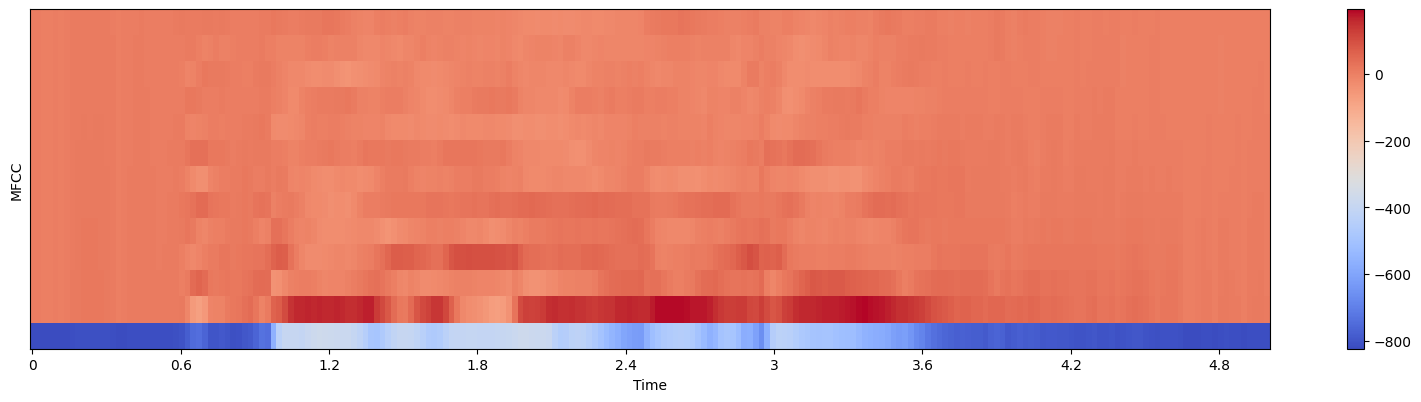

In [55]:
# Source - RAVDESS; Gender - Male; Emotion - Happy 
path="kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate=librosa.load(path, res_type='soxr_hq', duration=2.5, sr=22050*2, offset=0.5)
mfcc=librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate, color='red')
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

This code snippet demonstrates how to load audio data, extract MFCC features, calculate mean MFCC values, and compare the lengths of MFCC arrays for both female and male actors in the RAVDESS dataset.

In [57]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path="kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate=librosa.load(path, res_type='soxr_hq', duration=2.5, sr=22050*2,offset=0.5)  
female= librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

216


In [59]:
# Source - RAVDESS; Gender - Male; Emotion - Angry 
path="kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate=librosa.load(path, res_type='soxr_hq', duration=2.5, sr=22050*2, offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))


216


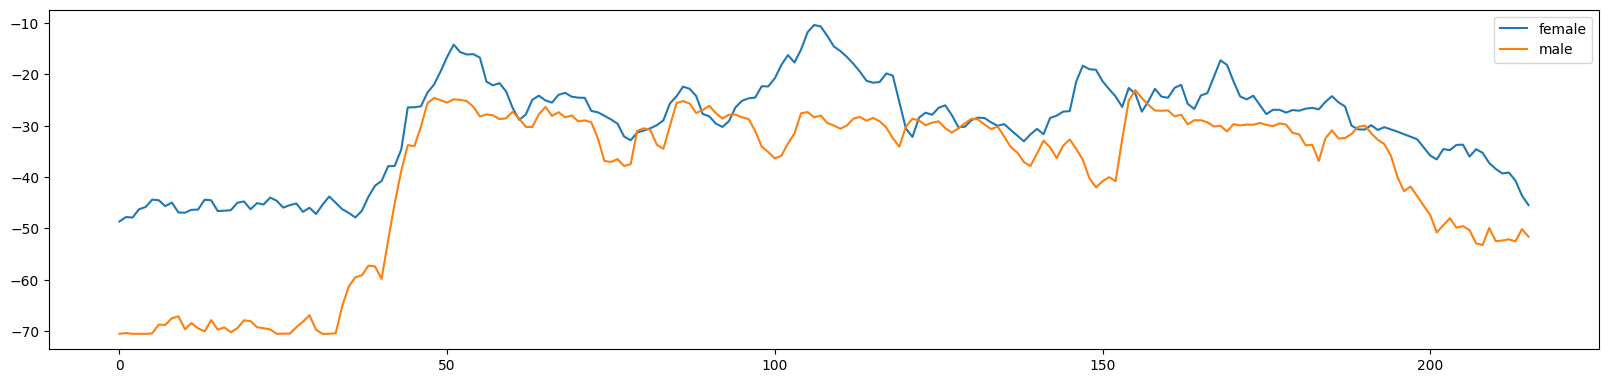

In [60]:
# Audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3, 1, 1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

### Preparing training and test sets from the dataset

In [3]:
# lets pick up the meta-data that we got from our first part of the Kernel
ref=pd.read_csv("Data_path.csv")
ref.head()

labels source                                               path
0  male_angry  SAVEE  kaggle/input/surrey-audiovisual-expressed-emot...
1  male_angry  SAVEE  kaggle/input/surrey-audiovisual-expressed-emot...
2  male_angry  SAVEE  kaggle/input/surrey-audiovisual-expressed-emot...
3  male_angry  SAVEE  kaggle/input/surrey-audiovisual-expressed-emot...
4  male_angry  SAVEE  kaggle/input/surrey-audiovisual-expressed-emot...

Note this takes a couple of minutes (~5 mins) as I'm iterating over 4 datasets

In [4]:
df=pd.DataFrame(columns=['feature'])

In [5]:
# loop feature extraction over the entire dataset

counter=0

for index, path in enumerate(ref.path):
    X, sample_rate=librosa.load(path, 
                                  res_type='soxr_hq',
                                  duration=2.5,
                                  sr=44100,
                                  offset=0.5)
    sample_rate=np.array(sample_rate)
    
    # Mean as the feature. Could do min and max etc as well.
    mfccs=np.mean(librosa.feature.mfcc(y=X,
                                         sr=sample_rate,
                                         n_mfcc=13), axis=0)
    
    df.loc[counter]=[mfccs]
    counter+=1

Check a few records to make sure its processed succesfully

In [6]:
print(len(df))

12162


In [7]:
df.head()

feature
0  [-4.6414204, -3.860898, -6.21919, -5.9265423, ...
1  [-8.690716, -12.522838, -22.928043, -23.243807...
2  [-8.814859, -12.819055, -24.178183, -23.84745,...
3  [-2.2684252, -4.317077, -12.285237, -13.083024...
4  [-13.485307, -16.26042, -25.884357, -27.827044...

Now extract the mean bands to its own feature columns

In [8]:
df=pd.concat([ref, pd.DataFrame(df['feature'].values.tolist())], axis=1)
df[:5]

labels source                                               path  \
0  male_angry  SAVEE  kaggle/input/surrey-audiovisual-expressed-emot...   
1  male_angry  SAVEE  kaggle/input/surrey-audiovisual-expressed-emot...   
2  male_angry  SAVEE  kaggle/input/surrey-audiovisual-expressed-emot...   
3  male_angry  SAVEE  kaggle/input/surrey-audiovisual-expressed-emot...   
4  male_angry  SAVEE  kaggle/input/surrey-audiovisual-expressed-emot...   

           0          1          2          3          4          5  \
0  -4.641420  -3.860898  -6.219190  -5.926542  -5.850419  -4.808960   
1  -8.690716 -12.522838 -22.928043 -23.243807 -22.926605 -23.432241   
2  -8.814859 -12.819055 -24.178183 -23.847450 -15.182783 -10.732485   
3  -2.268425  -4.317077 -12.285237 -13.083024 -12.041327 -11.819768   
4 -13.485307 -16.260420 -25.884357 -27.827044 -27.593534 -26.666508   

           6  ...        206        207        208        209        210  \
0  -2.513003  ...  -4.088851  -5.023864  -5.254714  -5.234095  -5.310307   
1 -14.830002  ... -22.627258 -22.633406 -22.511597 -24.300154 -24.496809   
2  -8.681472  ...        NaN        NaN        NaN        NaN        NaN   
3  -9.414148  ...        NaN        NaN        NaN        NaN        NaN   
4 -18.659025  ... -25.291666 -25.854906 -26.821354 -25.436455 -24.179941   

         211        212        213        214        215  
0  -5.621666  -6.072197  -6.611348  -3.999875   1.390506  
1 -22.895985 -23.511503 -24.342152 -16.465857  -8.936035  
2        NaN        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN        NaN  
4 -23.281618 -24.167494 -25.228062 -20.599659 -15.929615  

[5 rows x 219 columns]

In [9]:
# Replace NA values with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(12162, 219)


labels source                                               path  \
0  male_angry  SAVEE  kaggle/input/surrey-audiovisual-expressed-emot...   
1  male_angry  SAVEE  kaggle/input/surrey-audiovisual-expressed-emot...   
2  male_angry  SAVEE  kaggle/input/surrey-audiovisual-expressed-emot...   
3  male_angry  SAVEE  kaggle/input/surrey-audiovisual-expressed-emot...   
4  male_angry  SAVEE  kaggle/input/surrey-audiovisual-expressed-emot...   

           0          1          2          3          4          5  \
0  -4.641420  -3.860898  -6.219190  -5.926542  -5.850419  -4.808960   
1  -8.690716 -12.522838 -22.928043 -23.243807 -22.926605 -23.432241   
2  -8.814859 -12.819055 -24.178183 -23.847450 -15.182783 -10.732485   
3  -2.268425  -4.317077 -12.285237 -13.083024 -12.041327 -11.819768   
4 -13.485307 -16.260420 -25.884357 -27.827044 -27.593534 -26.666508   

           6  ...        206        207        208        209        210  \
0  -2.513003  ...  -4.088851  -5.023864  -5.254714  -5.234095  -5.310307   
1 -14.830002  ... -22.627258 -22.633406 -22.511597 -24.300154 -24.496809   
2  -8.681472  ...   0.000000   0.000000   0.000000   0.000000   0.000000   
3  -9.414148  ...   0.000000   0.000000   0.000000   0.000000   0.000000   
4 -18.659025  ... -25.291666 -25.854906 -26.821354 -25.436455 -24.179941   

         211        212        213        214        215  
0  -5.621666  -6.072197  -6.611348  -3.999875   1.390506  
1 -22.895985 -23.511503 -24.342152 -16.465857  -8.936035  
2   0.000000   0.000000   0.000000   0.000000   0.000000  
3   0.000000   0.000000   0.000000   0.000000   0.000000  
4 -23.281618 -24.167494 -25.228062 -20.599659 -15.929615  

[5 rows x 219 columns]

Split between train and test sets

In [10]:
X_train, X_test, y_train, y_test=train_test_split(df.drop(['path', 'labels', 'source'], axis=1), 
                                                  df.labels,
                                                  test_size=0.25,
                                                  shuffle=True,
                                                  random_state=42)

Lets see how the data present itself before normalization

In [11]:
X_train[150:160]

0          1          2          3          4          5    \
4950  -17.151682 -17.244827 -18.466816 -19.041790 -17.458557 -16.789858   
3860  -13.187058 -16.635159 -22.929104 -22.249760 -20.084362 -18.705603   
9761   -4.866232  -6.079025  -9.612997 -12.028503  -9.942913 -11.898907   
7620   -7.048536  -4.276906  -4.561899  -5.862065  -5.263921  -6.457928   
11586 -22.569693 -21.780056 -20.543293 -20.685152 -21.210340 -18.623173   
7914  -20.108978 -18.986406 -17.011845 -16.945843 -19.340393 -19.528681   
9513  -20.120302 -18.626917 -16.117317 -16.928160 -18.195051 -18.150383   
5835  -21.079794 -18.692656 -17.698631 -18.026659 -18.244177 -18.696201   
5389  -22.690166 -20.249851 -18.996241 -19.503618 -19.350641 -18.204979   
11222 -20.024044 -17.662510 -19.211340 -18.462515 -17.560719 -17.833384   

             6          7          8          9    ...        206        207  \
4950  -17.770760 -18.077051 -17.942303 -15.936176  ... -22.896925 -21.647274   
3860  -19.385784 -12.821361 -11.396360 -16.390905  ...   0.000000   0.000000   
9761  -13.991709 -13.555513 -14.022247 -15.103042  ...   0.000000   0.000000   
7620   -8.109058  -9.144416  -8.628797  -8.159860  ...   0.000000   0.000000   
11586 -18.477016 -16.254116 -14.318378 -15.218027  ...   0.000000   0.000000   
7914  -21.986706 -20.156376 -17.958517 -19.305113  ...   0.000000   0.000000   
9513  -19.234413 -18.348665 -16.911655 -16.632397  ... -17.835630 -19.359604   
5835  -16.613901 -17.839281 -18.049294 -17.869678  ...   0.000000   0.000000   
5389  -18.153227 -19.968248 -20.967724 -19.249760  ...   0.000000   0.000000   
11222 -17.908098 -20.574364 -18.598129 -15.971114  ... -18.044628 -18.117907   

             208        209        210        211        212        213  \
4950  -19.755720 -18.877504 -19.387081 -20.165422 -22.683271 -24.606504   
3860    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
9761    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
7620    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
11586   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
7914    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
9513  -17.753532 -19.133429   0.000000   0.000000   0.000000   0.000000   
5835    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
5389    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
11222 -19.653357 -20.737122 -20.259745 -18.360054 -15.558959 -17.484497   

             214        215  
4950  -24.070087 -23.253784  
3860    0.000000   0.000000  
9761    0.000000   0.000000  
7620    0.000000   0.000000  
11586   0.000000   0.000000  
7914    0.000000   0.000000  
9513    0.000000   0.000000  
5835    0.000000   0.000000  
5389    0.000000   0.000000  
11222 -17.016792 -19.113037  

[10 rows x 216 columns]

This code performs data normalization on the training and test datasets. Here's a breakdown:

1. __Compute Mean and Standard Deviation__:
    + `mean = np.mean(X_train, axis=0)` calculates the mean value of each feature across all training samples.
    + `std = np.std(X_train, axis=0)` calculates the standard deviation of each feature across all training samples.

2. __Normalize the Data__:
    + `X_train_normalized = (X_train - mean) / std` subtracts the mean from each feature and then divides by the standard deviation. This process standardizes each feature to have a mean of 0 and a standard deviation of 1.
    + `X_test_normalized = (X_test - mean) / std` applies the same normalization parameters (mean and standard deviation) obtained from the training data to normalize the test data. This ensures that the test data is normalized using the same scale as the training data.

3. __Check the Normalized Dataset__:
    + `X_train[150:160]` prints a subset of the normalized training data (rows 150 to 159) to verify that the normalization process has been applied correctly.

Data normalization is a common preprocessing step in machine learning to scale the features of a dataset to a similar range. It helps improve the convergence of optimization algorithms and can lead to better model performance, especially for models that are sensitive to the scale of input features.

In [87]:
# Lts do data normalization
mean=np.mean(X_train, axis=0)
std=np.std(X_train, axis=0)

X_train_normalized=(X_train-mean)/std
X_test_normalized=(X_test-mean)/std

In [88]:
# Check the dataset now 
X_train_normalized[150:160]

0         1         2         3         4         5         6    \
4950   0.369573  0.348426  0.428069  0.378853  0.490354  0.536053  0.455353   
3860   0.655092  0.393427  0.095927  0.140578  0.295606  0.393930  0.335750   
9761   1.254330  1.172610  1.087088  0.899773  1.047765  0.898895  0.735215   
7620   1.097168  1.305631  1.463058  1.357792  1.394791  1.302542  1.170861   
11586 -0.020614  0.013666  0.273511  0.256791  0.212096  0.400045  0.403050   
7914   0.156598  0.219874  0.536368  0.534532  0.350784  0.332869  0.143136   
9513   0.155783  0.246409  0.602950  0.535846  0.435730  0.435120  0.346960   
5835   0.086683  0.241557  0.485248  0.454253  0.432087  0.394628  0.541025   
5389  -0.029291  0.126615  0.388663  0.344551  0.350024  0.431070  0.427029   
11222  0.162715  0.317595  0.372652  0.421880  0.482777  0.458637  0.445182   

            7         8         9    ...       206       207       208  \
4950   0.427119  0.430749  0.575385  ... -0.883352 -0.815650 -0.695067   
3860   0.815606  0.914063  0.541824  ...  0.540134  0.526170  0.525704   
9761   0.761339  0.720183  0.636874  ...  0.540134  0.526170  0.525704   
7620   1.087396  1.118404  1.149312  ...  0.540134  0.526170  0.525704   
11586  0.561865  0.698318  0.628388  ...  0.540134  0.526170  0.525704   
7914   0.273420  0.429552  0.326743  ...  0.540134  0.526170  0.525704   
9513   0.407042  0.506846  0.524001  ... -0.568695 -0.673847 -0.571346   
5835   0.444694  0.422849  0.432684  ...  0.540134  0.526170  0.525704   
5389   0.287326  0.207370  0.330828  ...  0.540134  0.526170  0.525704   
11222  0.242524  0.382327  0.572807  ... -0.581688 -0.596880 -0.688742   

            209       210       211       212       213       214       215  
4950  -0.633169 -0.679371 -0.722646 -0.865385 -0.989040 -0.975182 -0.921816  
3860   0.526611  0.511774  0.512024  0.512889  0.501347  0.494860  0.488256  
9761   0.526611  0.511774  0.512024  0.512889  0.501347  0.494860  0.488256  
7620   0.526611  0.511774  0.512024  0.512889  0.501347  0.494860  0.488256  
11586  0.526611  0.511774  0.512024  0.512889  0.501347  0.494860  0.488256  
7914   0.526611  0.511774  0.512024  0.512889  0.501347  0.494860  0.488256  
9513  -0.648892  0.511774  0.512024  0.512889  0.501347  0.494860  0.488256  
5835   0.526611  0.511774  0.512024  0.512889  0.501347  0.494860  0.488256  
5389   0.526611  0.511774  0.512024  0.512889  0.501347  0.494860  0.488256  
11222 -0.747419 -0.732987 -0.612109 -0.432500 -0.557668 -0.544413 -0.670728  

[10 rows x 216 columns]

This code initializes a StandardScaler, adjusts the normalization parameters using the training data (X_train), and then normalizes both the training and test sets using these parameters. Finally, it displays a portion of the normalized training set to verify that the normalization has been applied correctly.

In [12]:
# Initialize the scales
scaler=StandardScaler()

# Calculate the mean and standard deviation in the training data
scaler.fit(X_train)

# Normalize the training and test sets
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


In [13]:
# Lets few preparation steps to get it into the correct format for keras
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [14]:
# One hot encode teh target
lb=LabelEncoder()

y_train_encoded=lb.fit_transform(y_train)
y_train=to_categorical(y_train_encoded)

y_test_encoded=lb.fit_transform(y_test)
y_test=to_categorical(y_test_encoded)

In [15]:
print(X_train.shape)
print(lb.classes_)

(9121, 216)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


Pickel the lb object for future use

In [16]:
filename='labels'
outfile=open(filename, 'wb')
pickle.dump(lb, outfile)
outfile.close()

In [17]:
X_train=np.expand_dims(X_train, axis=2)
X_test=np.expand_dims(X_test, axis=2)
X_train.shape

(9121, 216, 1)

## Building Model
This code defines a convolutional neural network (CNN) model using the Keras Sequential API. Here's a breakdown of each layer and operation:

1. __Input Layer__:
    + `model.add(Conv1D(256, 8, padding='same', input_shape=(X_train.shape[1],1)))`: Adds a 1D convolutional layer with 256 filters, kernel size 8, and padding 'same'. It expects input of shape (number_of_features, 1).

2. __Activation Layer__:
    + `model.add(Activation('relu'))`: Applies the ReLU activation function to introduce non-linearity.

3. __Convolutional Layers__:
    + Additional convolutional layers (Conv1D) are added with varying numbers of filters, kernel sizes, and padding. Each convolutional layer extracts higher-level features from the input data.

4. __Batch Normalization Layer__:
    + `model.add(BatchNormalization())`: Normalizes the activations of the previous layer to accelerate training and improve performance.

5. __Dropout Layer__:
    + `model.add(Dropout(0.25))`: Applies dropout regularization to prevent overfitting by randomly setting a fraction of input units to 0 during training.

6. __MaxPooling Layer__:
    + `model.add(MaxPooling1D(pool_size=(8)))`: Performs max pooling operation to reduce the spatial dimensions of the input data.

7. __Flatten Layer__:
    + `model.add(Flatten())`: Flattens the input into a 1D array, which is necessary before passing it to a fully connected layer.

8. __Fully Connected (Dense) Layer__:
    + `model.add(Dense(14))`: Adds a fully connected layer with 14 output units, representing the number of target classes.

9. __Output Activation Layer__:
    + `model.add(Activation('softmax'))`: Applies the softmax activation function to obtain probabilities for each class.

10. __Optimizer__:
    + The model is compiled using the RMSprop optimizer with a learning rate of 0.00001.

11. __Model Summary__:
    + `model.summary()`: Prints a summary of the model architecture, including the number of parameters in each layer and the total number of parameters in the model.

This CNN model is designed for classification tasks, where the input data is assumed to be in the form of sequential features.<br><br>
The following image presents an approximate illustration of how the structure of the neural network is presented when it was designed.

<img src='CNN-Conv1D.jpg' width="800" height="400">

In [100]:
# New model
model=Sequential()
model.add(Conv1D(256, 8, padding='same', input_shape=(X_train.shape[1], 1))) # X_train.shape[1] --> No. of columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14)) # Target class number
model.add(Activation('softmax'))
# opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
# opt = keras.optimizers.Adam(lr=0.0001)
opt=keras.optimizers.RMSprop(learning_rate=0.00001)

In [101]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 216, 256)          2304      
                                                                 
 activation_27 (Activation)  (None, 216, 256)          0         
                                                                 
 conv1d_25 (Conv1D)          (None, 216, 256)          524544    
                                                                 
 batch_normalization_6 (Bat  (None, 216, 256)          1024      
 chNormalization)                                                
                                                                 
 activation_28 (Activation)  (None, 216, 256)          0         
                                                                 
 dropout_6 (Dropout)         (None, 216, 256)          0         
                                                      

This line of code compiles the neural network model with specified settings for training. Here's a brief explanation of each argument:

1. `loss='categorical_crossentropy'`: This argument specifies the loss function to be used during training. In this case, 'categorical_crossentropy' is a common choice for multi-class classification problems with one-hot encoded target variables.

2. `optimizer=opt`: This argument specifies the optimizer to be used for updating the weights of the neural network during training. The opt variable holds the optimizer object, which determines the specific optimization algorithm and its parameters. In this example, the optimizer is an instance of the RMSprop optimizer with a specified learning rate.

3. `metrics=['accuracy']`: This argument specifies the evaluation metric(s) to be monitored during training. In this case, the model will calculate and report the accuracy of predictions on the validation set as one of the metrics. Accuracy measures the proportion of correctly classified samples out of the total number of samples.

Overall, this line of code configures the model for training by specifying the loss function, optimizer, and evaluation metric(s) to be used during the training process.

In [102]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

This line of code trains the compiled neural network model on the provided training data and labels. Here's a brief explanation of each argument:

1. `X_train`, `y_train`: These arguments represent the training data (`X_train`) and corresponding labels (`y_train`) used to train the model. The neural network learns from this data to make predictions.

2. `batch_size=16`: This argument specifies the number of samples that will be propagated through the network at a time during training. The training data is divided into batches, and the model's weights are updated after processing each batch. In this case, each batch contains 16 samples.

3. `epochs=100`: This argument specifies the number of times the entire training dataset will be passed forward and backward through the neural network. Each pass through the entire dataset is called an epoch. In this case, the training process will iterate over the entire dataset 100 times.

4. `validation_data=(X_test, y_test)`: This argument provides validation data (`X_test`) and corresponding labels (`y_test`) to evaluate the model's performance during training. The model's performance on the validation set is monitored after each epoch, allowing us to track how well the model generalizes to unseen data.

5. `model_history`: This variable holds the training history, including the loss and accuracy metrics, recorded during training. It provides valuable information for analyzing the model's performance over the course of training, such as detecting overfitting or underfitting.



In [103]:
model_history=model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
571/571 [==============================] - 41s 68ms/step - loss: 2.4147 - accuracy: 0.1852 - val_loss: 2.4531 - val_accuracy: 0.2249
Epoch 2/100
571/571 [==============================] - 38s 66ms/step - loss: 2.1787 - accuracy: 0.2742 - val_loss: 2.2238 - val_accuracy: 0.2881
Epoch 3/100
571/571 [==============================] - 38s 66ms/step - loss: 2.0615 - accuracy: 0.3026 - val_loss: 2.1277 - val_accuracy: 0.3085
Epoch 4/100
571/571 [==============================] - 38s 66ms/step - loss: 1.9849 - accuracy: 0.3263 - val_loss: 2.0576 - val_accuracy: 0.3288
Epoch 5/100
571/571 [==============================] - 38s 67ms/step - loss: 1.9235 - accuracy: 0.3462 - val_loss: 2.0151 - val_accuracy: 0.3598
Epoch 6/100
571/571 [==============================] - 40s 71ms/step - loss: 1.8755 - accuracy: 0.3571 - val_loss: 1.9910 - val_accuracy: 0.3584
Epoch 7/100
571/571 [==============================] - 40s 70ms/step - loss: 1.8361 - accuracy: 0.3759 - val_loss: 1.9404 - val_ac

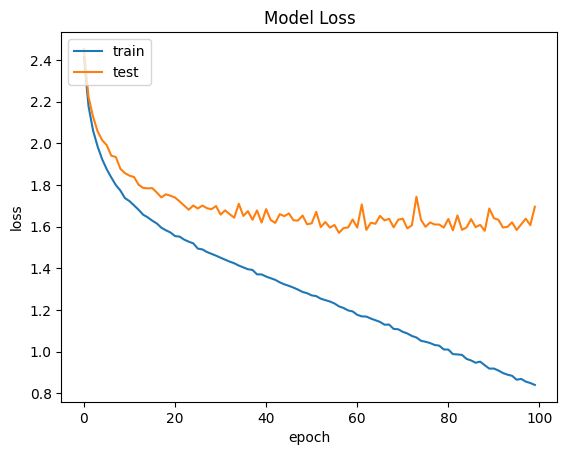

In [105]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The resulting plot shows the trend of both training and validation loss over the training epochs, providing insights into how well the model is learning from the training data and generalizing to unseen data. If both training and validation loss decrease and stabilize, it indicates that the model is learning effectively. However, if the training loss continues to decrease while the validation loss increases or remains stagnant, it may suggest overfitting. Conversely, if both losses remain high and don't decrease significantly, it may indicate underfitting.

### Save model and weights

In [107]:
model_name='Emotion_model.h5'
save_dir=os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

model_path=os.path.join(save_dir, model_name)
model.save(model_path)
print("Save model and weights at %s " % model_path)

# Save the model to disk
model_json=model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at c:\Users\Astrian\Documents\IA Projects\IA Projects\16 - Speech emotion recognition\saved_models\Emotion_model.h5 


### Loading json and model architecture

In [18]:
json_file=open('model_json.json', 'r')
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)

# Load weights into new model
loaded_model.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from disk")

# keras optimizer
opt=keras.optimizers.RMSprop(learning_rate=0.00001)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score=loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk


accuracy: 42.95%


## Prediction and evaluation

In [19]:
preds=loaded_model.predict(X_test, batch_size=16, verbose=1)
preds=preds.argmax(axis=1)
preds

191/191 [==============================] - 3s 16ms/step


array([2, 3, 1, ..., 0, 4, 3], dtype=int64)

In [20]:
# predictions 
preds=preds.astype(int).flatten()
preds=(lb.inverse_transform((preds)))
preds=pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual=actual.astype(int).flatten()
actual=(lb.inverse_transform((actual)))
actual=pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf=actual.join(preds)
finaldf[110:125]



actualvalues  predictedvalues
110     female_happy       female_sad
111        male_fear       female_sad
112         male_sad      female_fear
113   female_disgust   female_disgust
114     female_happy     female_angry
115   female_neutral       female_sad
116     female_angry      female_fear
117       female_sad       female_sad
118      female_fear   female_disgust
119     female_angry     female_happy
120       male_happy     female_angry
121  female_surprise  female_surprise
122      female_fear      female_fear
123         male_sad      female_fear
124       male_angry       male_angry

Write out the predictions to disk

In [21]:
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

actualvalues
predictedvalues              
female_angry              378
female_disgust            285
female_fear               478
female_happy              499
female_neutral            347
female_sad                263
female_surprise           113
male_angry                145
male_disgust               96
male_fear                  34
male_happy                112
male_neutral               95
male_sad                  174
male_surprise              22

From now on, we will be using the functions created in the `functions_plot.py` file. These functions have been designed to perform specific tasks such as plotting confusion matrices and handling gender recoding. By importing these functions into our notebook, we can leverage their functionality to streamline our analysis and visualization processes. This modular approach allows us to maintain cleaner and more organized code, promoting reusability and easier maintenance. Let's import these functions and explore how they can enhance our workflow.<br><br>
A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. It allows visualization of the performance of an algorithm by showing the counts of true positive, true negative, false positive, and false negative predictions.

In [42]:
# Get the predictions file
finaldf=pd.read_csv("Predictions.csv")
classes=finaldf.actualvalues.unique()
classes.sort()

The accuracy score is: 0.43


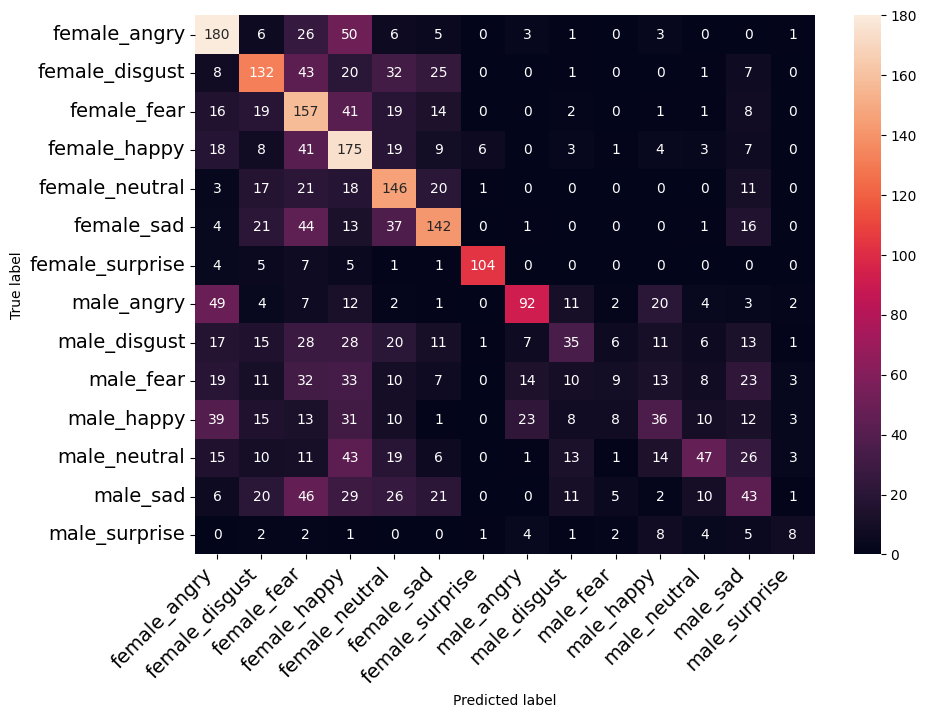

In [43]:
# Confusion matrix
c=confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(f"The accuracy score is: {np.round(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues), 2)}")
print_confusion_matrix(c, class_names=classes)

A classification report is a summary of the performance of a classification model that provides several evaluation metrics for each class in the dataset. It typically includes metrics such as precision, recall, F1-score, and support for each class.

- __Precision__: It measures the proportion of true positive predictions among all positive predictions made by the model. It is calculated as TP / (TP + FP), where TP is the number of true positives and FP is the number of false positives.

- __Recall__: It measures the proportion of true positive predictions that were correctly identified by the model. It is calculated as TP / (TP + FN), where TP is the number of true positives and FN is the number of false negatives.

- __F1-score__: It is the harmonic mean of precision and recall and provides a single score that balances both metrics. It is calculated as 2 * (precision * recall) / (precision + recall).

- __Support__: It represents the number of actual occurrences of each class in the dataset.

The classification report provides these metrics for each class in the dataset, as well as the overall performance averaged across all classes. It helps in understanding the strengths and weaknesses of the classification model and provides insights into how well it is performing for different classes.

In [44]:
# Clasification report
classes=finaldf.actualvalues.unique()
classes.sort()
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

                 precision    recall  f1-score   support

   female_angry       0.48      0.64      0.55       281
 female_disgust       0.46      0.49      0.48       269
    female_fear       0.33      0.56      0.42       278
   female_happy       0.35      0.60      0.44       294
 female_neutral       0.42      0.62      0.50       237
     female_sad       0.54      0.51      0.52       279
female_surprise       0.92      0.82      0.87       127
     male_angry       0.63      0.44      0.52       209
   male_disgust       0.36      0.18      0.24       199
      male_fear       0.26      0.05      0.08       192
     male_happy       0.32      0.17      0.22       209
   male_neutral       0.49      0.22      0.31       209
       male_sad       0.25      0.20      0.22       220
  male_surprise       0.36      0.21      0.27        38

       accuracy                           0.43      3041
      macro avg       0.44      0.41      0.40      3041
   weighted avg       0.43   

In [45]:
modidf=finaldf

modidf['actualvalues']=finaldf.actualvalues.replace({
    'female_angry':'female', 
    'female_disgust':'female', 
    'female_fear':'female', 
    'female_happy':'female', 
    'female_sad':'female', 
    'female_surprise':'female', 
    'female_neutral':'female', 
    'male_angry':'male', 
    'male_fear':'male', 
    'male_happy':'male', 
    'male_sad':'male', 
    'male_surprise':'male', 
    'male_neutral':'male', 
    'male_disgust':'male'
})

modidf['predictedvalues']=finaldf.predictedvalues.replace({
    'female_angry':'female', 
    'female_disgust':'female', 
    'female_fear':'female', 
    'female_happy':'female', 
    'female_sad':'female', 
    'female_surprise':'female', 
    'female_neutral':'female', 
    'male_angry':'male', 
    'male_fear':'male', 
    'male_happy':'male', 
    'male_sad':'male', 
    'male_surprise':'male', 
    'male_neutral':'male', 
    'male_disgust':'male'
})

classes=modidf.actualvalues.unique()
classes.sort()

The accuracy score is: 0.75


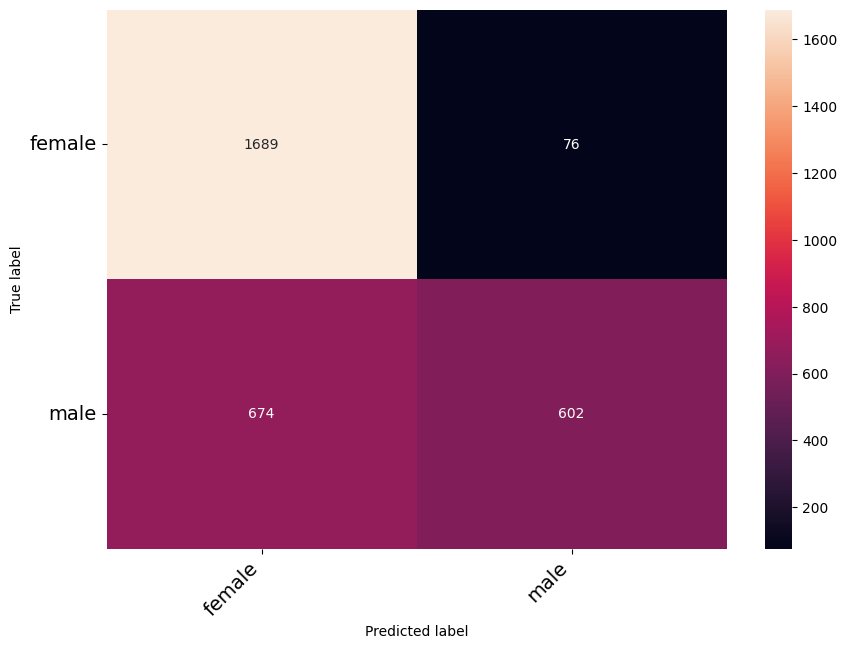

In [46]:
# Confusion matrix 
c=confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(f"The accuracy score is: {np.round(accuracy_score(modidf.actualvalues, modidf.predictedvalues), 2)}")
print_confusion_matrix(c, class_names = classes)

In [47]:
# Classification report 
classes=modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

      female       0.71      0.96      0.82      1765
        male       0.89      0.47      0.62      1276

    accuracy                           0.75      3041
   macro avg       0.80      0.71      0.72      3041
weighted avg       0.79      0.75      0.73      3041



In [48]:
modidf=pd.read_csv("Predictions.csv")

modidf['actualvalues']=modidf.actualvalues.replace({
    'female_angry':'angry', 
    'female_disgust':'disgust', 
    'female_fear':'fear', 
    'female_happy':'happy', 
    'female_sad':'sad', 
    'female_surprise':'surprise', 
    'female_neutral':'neutral', 
    'male_angry':'angry', 
    'male_fear':'fear', 
    'male_happy':'happy', 
    'male_sad':'sad', 
    'male_surprise':'surprise', 
    'male_neutral':'neutral', 
    'male_disgust':'disgust'
})

modidf['predictedvalues']=modidf.predictedvalues.replace({
    'female_angry':'angry', 
    'female_disgust':'disgust', 
    'female_fear':'fear', 
    'female_happy':'happy', 
    'female_sad':'sad', 
    'female_surprise':'surprise', 
    'female_neutral':'neutral', 
    'male_angry':'angry', 
    'male_fear':'fear', 
    'male_happy':'happy', 
    'male_sad':'sad', 
    'male_surprise':'surprise', 
    'male_neutral':'neutral', 
    'male_disgust':'disgust'
})

classes = modidf.actualvalues.unique() 
classes.sort() 

The accuracy score is: 0.49


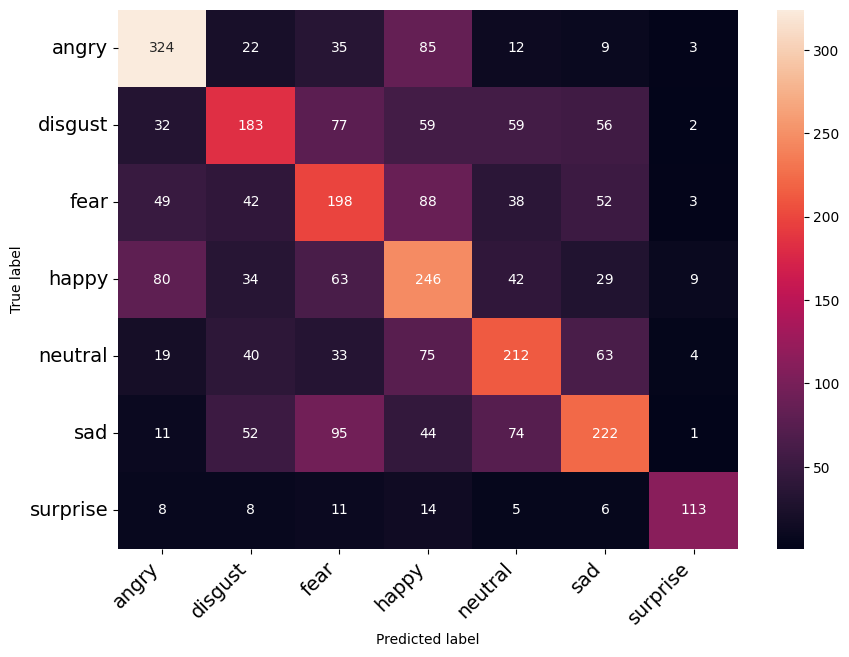

In [49]:
# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(f"The accuracy score is: {np.round(accuracy_score(modidf.actualvalues, modidf.predictedvalues), 2)}")
print_confusion_matrix(c, class_names = classes)

In [50]:
# Classification report 
classes=modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.62      0.66      0.64       490
     disgust       0.48      0.39      0.43       468
        fear       0.39      0.42      0.40       470
       happy       0.40      0.49      0.44       503
     neutral       0.48      0.48      0.48       446
         sad       0.51      0.44      0.47       499
    surprise       0.84      0.68      0.75       165

    accuracy                           0.49      3041
   macro avg       0.53      0.51      0.52      3041
weighted avg       0.50      0.49      0.49      3041

